## Lab 7 - csv/optimization                      
 - by Subrahmanyam Gantasala MM20S300

### Q5) For the function J(w) = w^2 + (54/w), implement the following methods: 
- (a) bracketing method (choose you own a, b, n). 
- (b) Use the bracketed value to get to the critical point employing interval halving method and 
- (c) identify the critical point using Newton-Raphson method and 
- (d) vary the result manually using the optimality criteria (post this write-up as well in .jped/.png etc).

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
w = np.linspace(0,20,20)

In [29]:
J = w**2 + (54/w)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


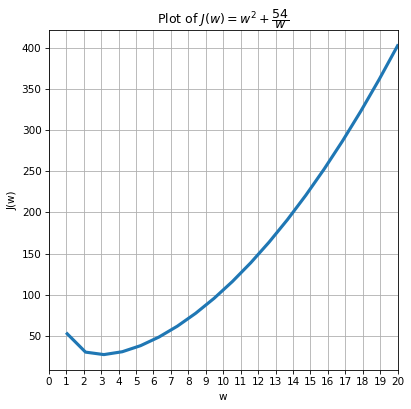

In [49]:
plt.figure(figsize=(6,6), dpi=75)
plt.grid('on')
plt.plot(w,J,lw=3)
plt.xlabel('w')
plt.ylabel('J(w)')
plt.title(r'Plot of $J(w) = w^2 + \dfrac{54}{w}$')
plt.xlim(0,20)
plt.xticks(np.arange(0,21))
plt.show()


In [31]:
J.argmin() #the minimum values is 3

3

In [4]:
def J(w):
    return w**2 + (54/w)

In [11]:
#Lets use exhaustive search in bracket methods, to compare how accurately it predicts the min value (optimum value)

#interval
def bracket(a,b,n):
    delw = (b-a)/n
    
    w1 = a
    w2 = w1+delw
    w3 = w2+delw

    while (w3<b):
        j1 = J(w1)
        j2 = J(w2)
        j3 = J(w3)
    
        if j1>j2 and j2<j3:
            print(f'The min value is in between {w1} and {w3} and is approximately {w2}')
            wmin=w2
            break
        else :
            w1=w2
            w2=w3
            w3=w2+delw
    return w2
    

In [12]:
bracket(1,20,20)

The min value is in between 1.95 and 3.8499999999999996 and is approximately 2.9


2.9

In [29]:
bracket(1,20,1000)

The min value is in between 2.9760000000000018 and 3.014000000000002 and is approximately 2.995000000000002


2.995000000000002

So the exhaustive search method gives min value of w as 2.9 with n=20

In [22]:
mins=[]
for i in range(1,100):
    mins.append(bracket(1,20,i))

The min value is in between 1 and 10.5 and is approximately 5.75
The min value is in between 1 and 8.6 and is approximately 4.8
The min value is in between 1 and 7.333333333333332 and is approximately 4.166666666666666
The min value is in between 1 and 6.428571428571429 and is approximately 3.7142857142857144
The min value is in between 1 and 5.75 and is approximately 3.375
The min value is in between 1 and 5.222222222222222 and is approximately 3.111111111111111
The min value is in between 1 and 4.8 and is approximately 2.9
The min value is in between 1 and 4.454545454545455 and is approximately 2.7272727272727275
The min value is in between 1 and 4.166666666666666 and is approximately 2.583333333333333
The min value is in between 1 and 3.9230769230769234 and is approximately 2.4615384615384617
The min value is in between 2.357142857142857 and 5.071428571428571 and is approximately 3.7142857142857144
The min value is in between 2.2666666666666666 and 4.8 and is approximately 3.5333333

Text(0.5,0,'n values')

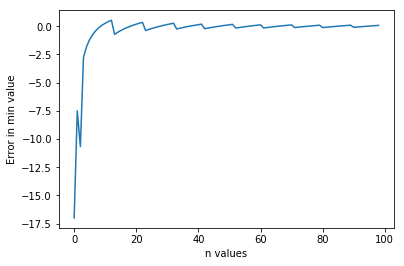

In [23]:
min_array = np.array(mins)
error = 3-min_array
plt.plot((error))
plt.ylabel('Error in min value')
plt.xlabel('n values')

In [26]:
def interval_half(a,b,epsilon):

    L = b-a #length of the interval
    
    while (abs(L) > epsilon):
        wm = (a+b)/2 #middle point 
        jm = J(wm)
        w1 = a+L/4
        w2 = b-L/4
        j1 = J(w1)
        j2 = J(w2)
        if j1 < jm:
            b = wm
            wm = w1
            break
        elif j2 < jm:
            a = wm
            wm = w2
            break
        else:
            a = w1
            b = w2
        L = b-a
    return f'Min lies between {a} and {b}'

In [27]:
print(interval_half(1,5,10e-3))

Min lies between 2.99609375 and 3.00390625


In [28]:
print(interval_half(1.95,3.84,10e-3))

Min lies between 2.8949999999999996 and 3.1312499999999996
